#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import  layers,models


In [ ]:
train_df = "/kaggle/input/fruit-and-vegetable-image-recognition/train"
test_df = "/kaggle/input/fruit-and-vegetable-image-recognition/test"
val_df = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

#Import Dataset

In [13]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle

In [15]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:30<00:00, 80.3MB/s]
100% 1.98G/1.98G [00:30<00:00, 69.1MB/s]


In [16]:
import zipfile

with zipfile.ZipFile("fruit-and-vegetable-image-recognition.zip", 'r') as zip_ref:
    zip_ref.extractall("fruits_vegetables")

In [17]:
img_width = 180
img_height = 180

In [18]:
data_train = tf.keras.utils.image_dataset_from_directory(
    "fruits_vegetables/train",
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [19]:
data_cat = data_train.class_names

In [20]:

data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [21]:
data_val = tf.keras.utils.image_dataset_from_directory(
    "fruits_vegetables/validation",
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [22]:
data_test = tf.keras.utils.image_dataset_from_directory(
    "fruits_vegetables/test",
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


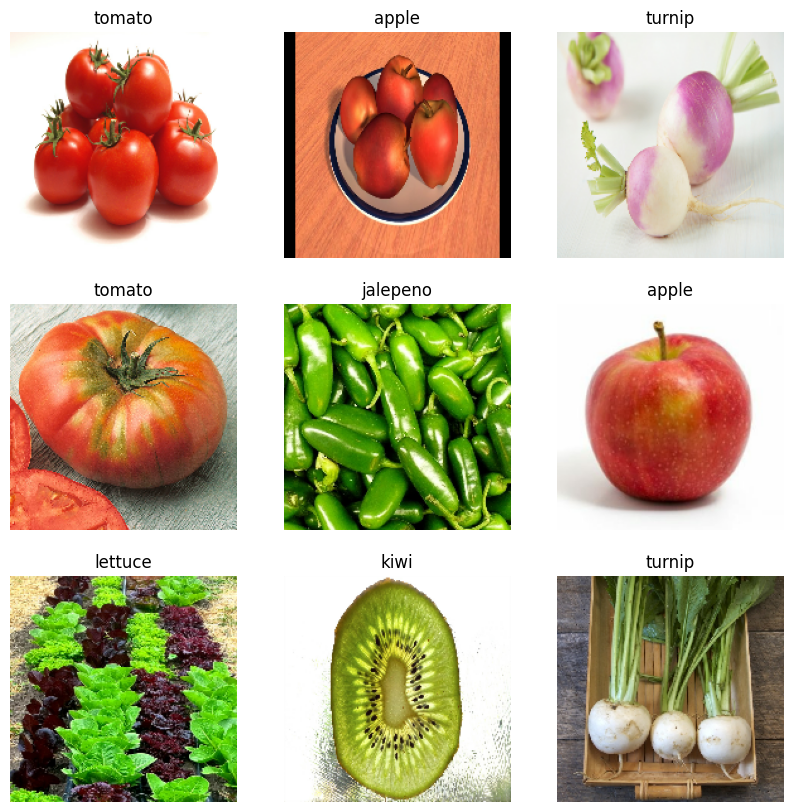

In [23]:
#Visualization
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis("off")


#Model

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
model = Sequential([
    layers.Rescaling(1./225),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [27]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Train Model

In [28]:
history = model.fit(data_train, validation_data=data_val, epochs=25)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.0770 - loss: 3.5460 - val_accuracy: 0.3761 - val_loss: 2.1619
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.3062 - loss: 2.4254 - val_accuracy: 0.6524 - val_loss: 1.3328
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.4710 - loss: 1.8161 - val_accuracy: 0.8120 - val_loss: 0.7645
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.6679 - loss: 1.1501 - val_accuracy: 0.8974 - val_loss: 0.5301
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8456 - loss: 0.5721 - val_accuracy: 0.9345 - val_loss: 0.4245
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.9179 - loss: 0.3171 - val_accuracy: 0.9487 - val_loss: 0.3757
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.9624 - loss: 0.1756 - val_accuracy: 0.9487 - val_loss: 0.3747
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9734 - loss: 0.1763 - val_accuracy: 0.9373 - v

Training and Validation performance

Text(0.5, 1.0, 'Loss')

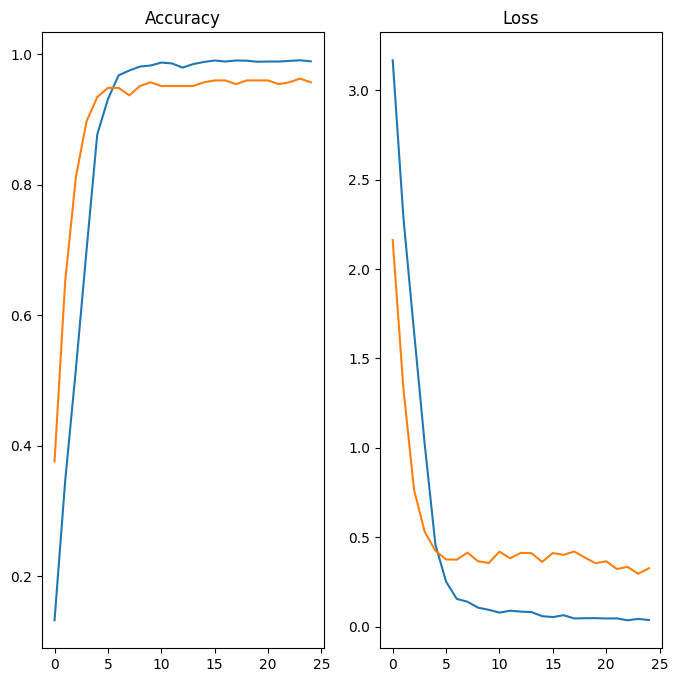

In [29]:
epochs_range = range(25)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

#Prediction

In [30]:
image = 'fruits_vegetables/test/cabbage/Image_1.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [31]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print(f'Veg/Fruit in image is {data_cat[np.argmax(score)]}')
print(f'accuracy of {np.max(score) * 100:0.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
Veg/Fruit in image is cabbage
accuracy of 100.00%
